## BIGHORN PEAK H04 BH - T&D Analysis

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
df_traj = pd.read_excel('survey.xlsx')
df_traj = df_traj.sort_values(by=['MD'])

md = df_traj['MD'].tolist()
tvd = df_traj['TVDCalc'].tolist()
inc = df_traj['Inclination'].tolist()
del_x = df_traj['NSCalc'].tolist()
del_y = df_traj['EWCalc'].tolist()

fig = px.line_3d(df_traj, x='NSCalc', y='EWCalc', z='TVDCalc',title='BIGHORN PEAK H04 BH - 3D Trajectory')
fig.update_scenes(zaxis_autorange="reversed")
fig.show()

In [3]:
import pickle

#loads the pickle file with the GOM production data 
fr00 = open('df_ts.pickle','rb')  
df_ts = pickle.load(fr00)  
fr00.close()

In [1]:
time = df_ts.index
trq = df_ts['Rotary Torque']
hkld = df_ts['Hook Load']
wob = df_ts['Weight on Bit']
md = df_ts['Hole Depth']
mbp = df_ts['Bit Depth']
diff = df_ts['Bit Depth'] - df_ts['Hole Depth']
rpm = df_ts['Rotary RPM']
spp = df_ts['Standpipe Pressure']

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2, subplot_titles=('Rotary Torque', 'Hook Load', 'Rotary RPM', 'Bit Depth', 
                                                    'Weight on Bit', 'Standpipe Pressure', 'Hole Depth', 'Relative Depth'))

fig.append_trace(go.Scatter(
    x=time,
    y=trq,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=time,
    y=rpm,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=time,
    y=wob
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=time,
    y=md,
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=time,
    y=hkld,
), row=1, col=2)

fig.append_trace(go.Scatter(
    x=time,
    y=mbp,
), row=2, col=2)

fig.append_trace(go.Scatter(
    x=time,
    y=spp
), row=3, col=2)

fig.append_trace(go.Scatter(
    x=time,
    y=diff,
), row=4, col=2)

fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.update_layout(showlegend=False)
fig.show()

NameError: name 'df_ts' is not defined

### BHA Run 1 and T&D Model Inputs

MW = 8.8 ppg (WBM) <br>
DP_od = 5.5 in. <br>
DP_id = 3.8 in. <br>
BHA_len = 458.11 ft <br>
BHA_buoyant_weight = 27750.0 lbf <br>
Build_up_radius = 0 ft <br>
Vertical_section = 3025 ft <br>
density_steel = 65.5 ppg <br>
weight_steel_air = 24.76 lbf/ft <br>
<p>
mu=0.3;           %friction factor <br>
WBHA=27750;        %Weight of BHA (lbf) <br>
TBHA=0;            %Torque at the bit/BHA <br>
rp=ro/(12);         %drillpipe outer radius (ft) <br>
Rb=8360;           %Build-up radius (ft) <br>
Rd=0;             %Drop-off radius (ft) <br>
V=[1415,3025;1,2]; %Depth (ft) at which each segment(vertical/build-up/slant/drop-off) ends <br>
<p>
%The second row of vector V is a tag which determines whether each segment <br>
%is a vertical section, Build up, tangent or drop off section. Horizontal <br>
%Section is a special case of the tangent section. <br>
%1 ==>Vertical Section <br>
%2 ==>Build up Section <br>
%3 ==>Tangent Section <br>
%4 ==>Drop off Section <br>

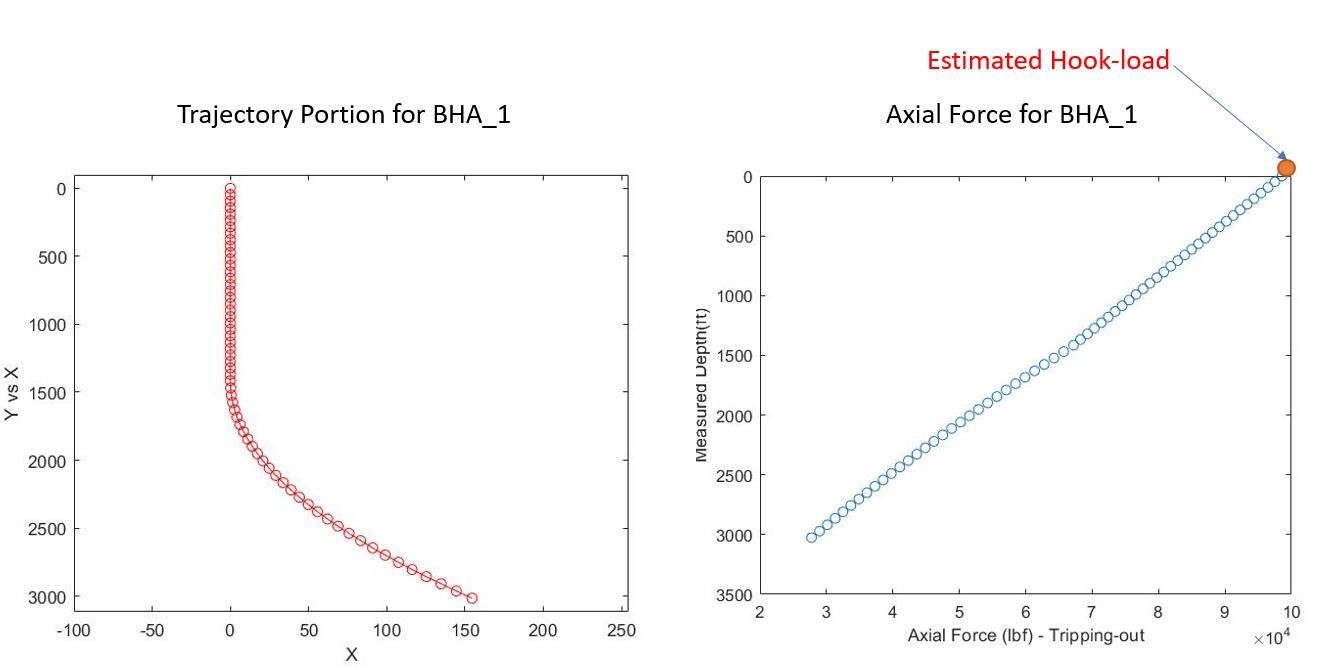

In [5]:
from quadSmoothing import *

df_1 = df_ts[(df_ts['Weight on Bit']==0) & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])>=10)
             & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])<=100) & (df_ts['Hole Depth']<3050) & (df_ts['Hole Depth']>3024)
            & (df_ts.index <= pd.to_datetime('2021-10-08 01:00:00'))]

df_1['HKLA'] = despike_log(np.array(df_1['Hook Load']), 2, 0)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

time = df_1.index
hkld = df_1['HKLA']
md = df_1['Hole Depth']
mpb = df_1['Bit Depth']
t = time[5:35]
hkld_predicted = [98560]*len(t)


# Create traces
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=time, y=hkld,
                    mode='lines',
                    name='hkld'))
fig.add_trace(go.Scatter(x=t, y=hkld_predicted,
                    mode='markers',
                    name='hkld_predicted'))
fig.add_trace(go.Scatter(x=time, y=md,
                    mode='lines',
                    name='md'), secondary_y=True)
fig.add_trace(go.Scatter(x=time, y=mpb,
                    mode='lines', name='mpb'), secondary_y=True)
fig.update_yaxes(range=[50000, 150000], secondary_y=False)
fig.show()

/var/folders/wg/288d_l295r70x7_5560f6g_80000gn/T/ipykernel_44699/1279738249.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### BHA Run 2 and T&D Model Inputs

MW = 9.5 ppg (OBM) <br>
DP_od = 5 in. <br>
DP_id = 3.8 in. <br>
BHA_len = 2726.66 ft <br>
BHA_buoyant_weight = 42240 lbf <br>
density_steel = 65.5 ppg <br>
weight_steel_air = 19.9 lbf/ft <br>
<p>
mu=0.2;           %friction factor <br>
WBHA=42240;        %Weight of BHA (lbf) <br>
TBHA=0;            %Torque at the bit/BHA <br>
rp=ro/(12);         %drillpipe outer radius (ft) <br>
Rb=1641;                          %Build-up radius (ft)
Rd=0;                          %Drop-off radius (ft)
V=[9217,9790;1,2]; %Depth (ft) at which each segment(vertical/build-up/slant/drop-off) ends
<p>
%The second row of vector V is a tag which determines whether each segment <br>
%is a vertical section, Build up, tangent or drop off section. Horizontal <br>
%Section is a special case of the tangent section. <br>
%1 ==>Vertical Section <br>
%2 ==>Build up Section <br>
%3 ==>Tangent Section <br>
%4 ==>Drop off Section <br>

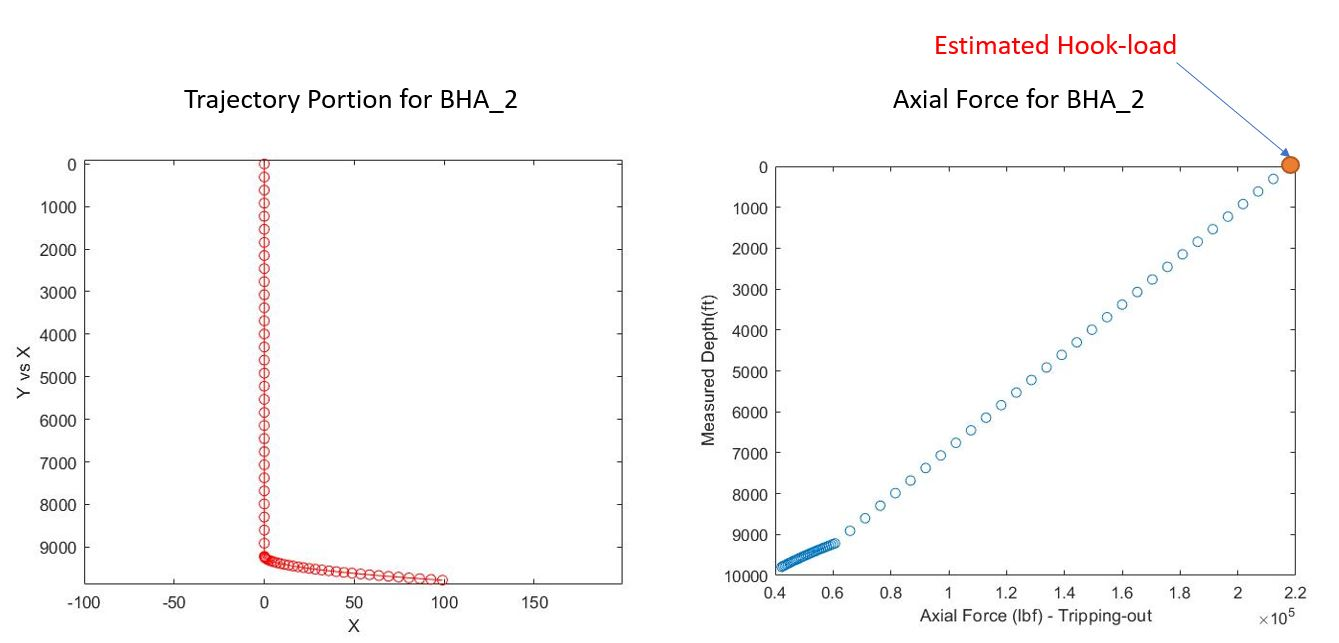

In [6]:
df_2 = df_ts[(df_ts['Weight on Bit']==0) & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])>=10)
             & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])<=100) & (df_ts['Hole Depth']<9791) & (df_ts['Hole Depth']>9311)
            & (df_ts.index <= pd.to_datetime('2021-10-15 16:00:00'))]

df_2['HKLA'] = despike_log(np.array(df_2['Hook Load']), 2, 0)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

time = df_2.index
hkld = df_2['HKLA']
md = df_2['Hole Depth']
mpb = df_2['Bit Depth']
t = time[-500:]
hkld_predicted = [217500]*len(t)


# Create traces
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=time, y=hkld,
                    mode='lines',
                    name='hkld'))
fig.add_trace(go.Scatter(x=t, y=hkld_predicted,
                    mode='markers',
                    name='hkld_predicted'))
fig.add_trace(go.Scatter(x=time, y=md,
                    mode='lines',
                    name='md'), secondary_y=True)
fig.add_trace(go.Scatter(x=time, y=mpb,
                    mode='lines', name='mpb'), secondary_y=True)
fig.update_yaxes(range=[50000, 300000], secondary_y=False)
fig.show()

/var/folders/wg/288d_l295r70x7_5560f6g_80000gn/T/ipykernel_44699/2928948564.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### BHA Run 3 and T&D Model Inputs

MW = 8.4 ppg (OBM) <br>
DP_od = 4.5 in. <br>
DP_id = 3.8 in. <br>
BHA_len = 2804.6 ft <br>
BHA_buoyant_weight = 43000 lbf <br>
density_steel = 65.5 ppg <br>
weight_steel_air = 17.84 lbf/ft <br>
<p>
mu=0.35;           %friction factor <br>
WBHA=85900;        %Weight of BHA (lbf) <br>
TBHA=0;            %Torque at the bit/BHA <br>
rp=ro/(12);         %drillpipe outer radius (ft) <br>
Rb=946;           %Build-up radius (ft) <br>
Rd=0;                          %Drop-off radius (ft)
V=[9311,10772,16884;1,2,3]; %Depth (ft) at which each segment(vertical/build-up/slant/drop-off) ends
<p>
%The second row of vector V is a tag which determines whether each segment <br>
%is a vertical section, Build up, tangent or drop off section. Horizontal <br>
%Section is a special case of the tangent section. <br>
%1 ==>Vertical Section <br>
%2 ==>Build up Section <br>
%3 ==>Tangent Section <br>
%4 ==>Drop off Section <br>

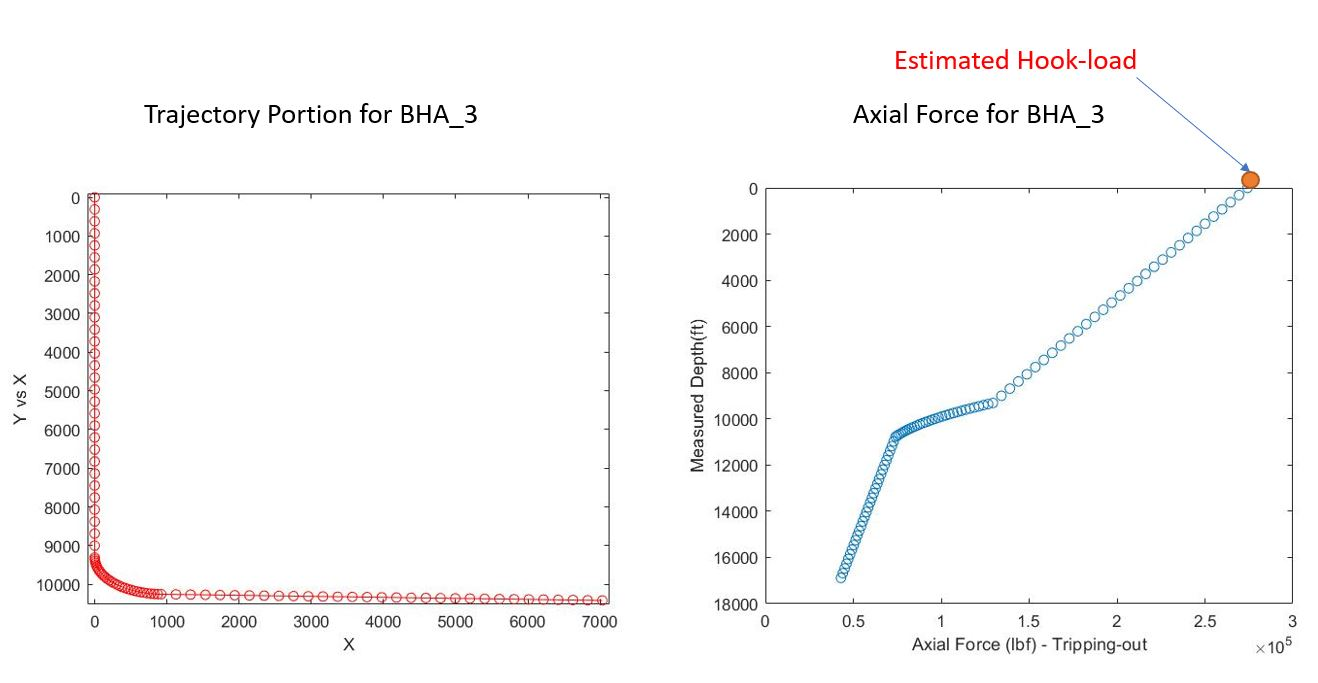

In [7]:
df_3 = df_ts[(df_ts['Weight on Bit']==0) & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])>=10)
             & ((df_ts['Hole Depth'] - df_ts['Bit Depth'])<=100) & (df_ts['Hole Depth']<16890) & (df_ts['Hole Depth']>9790)
            & (df_ts.index >= pd.to_datetime('2021-11-02 17:00:00'))]

df_3['HKLA'] = despike_log(np.array(df_3['Hook Load']), 2, 0)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

time = df_3.index
hkld = df_3['HKLA']
md = df_3['Hole Depth']
mpb = df_3['Bit Depth']
t = time[-500:]
hkld_predicted = [274200]*len(t)


# Create traces
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=time, y=hkld,
                    mode='lines',
                    name='hkld'))
fig.add_trace(go.Scatter(x=t, y=hkld_predicted,
                    mode='markers',
                    name='hkld_predicted'))
fig.add_trace(go.Scatter(x=time, y=md,
                    mode='lines',
                    name='md'), secondary_y=True)
fig.add_trace(go.Scatter(x=time, y=mpb,
                    mode='lines', name='mpb'), secondary_y=True)
fig.update_yaxes(range=[50000, 500000], secondary_y=False)
fig.show()

/var/folders/wg/288d_l295r70x7_5560f6g_80000gn/T/ipykernel_44699/3501707515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

